# **2. Linear Regression**

###(a) Pseudo-inverse: Explain what is the pseudo-inverse of a matrix. (2 points)
###Write the expression for pseudo-inverse to find solution to:


In [107]:
'''A pseudoinverse is a matrix inverse-like object that may be defined for a complex matrix, even if it is not necessarily square.
 For any given complex matrix, it is possible to define many possible pseudoinverses. 
The most commonly encountered pseudoinverse is the Moore-Penrose matrix inverse,
which is a special case of a general type of pseudoinverse known as a matrix 1-inverse. 
'''

'A pseudoinverse is a matrix inverse-like object that may be defined for a complex matrix, even if it is not necessarily square.\n For any given complex matrix, it is possible to define many possible pseudoinverses. \nThe most commonly encountered pseudoinverse is the Moore-Penrose matrix inverse,\nwhich is a special case of a general type of pseudoinverse known as a matrix 1-inverse. \n'

### i. Under-determined system of equations (2 points)

In [108]:
'''
a system of linear equations or a system of polynomial equations is considered underdetermined if there are fewer equations than unknowns (in contrast to an overdetermined system,
where there are more equations than unknowns).
The terminology can be explained using the concept of constraint counting.
we know that underdetermined problems occur when there are more unknowns than data, that is, when M > N. 
We must note, however, that there is no special reason why the prediction error must be zero for an underdetermined problem.

the critical case (between overdetermined and underdetermined) occurs when the number of equations and the number of free variables are equal. 
For every variable giving a degree of freedom, there exists a corresponding constraint removing a degree of freedom. 
The underdetermined case, by contrast, occurs when the system has been underconstrained—that is, when the unknowns outnumber the equations. 

'''




'\na system of linear equations or a system of polynomial equations is considered underdetermined if there are fewer equations than unknowns (in contrast to an overdetermined system,\nwhere there are more equations than unknowns).\nThe terminology can be explained using the concept of constraint counting.\nwe know that underdetermined problems occur when there are more unknowns than data, that is, when M > N. \nWe must note, however, that there is no special reason why the prediction error must be zero for an underdetermined problem.\n\nthe critical case (between overdetermined and underdetermined) occurs when the number of equations and the number of free variables are equal. \nFor every variable giving a degree of freedom, there exists a corresponding constraint removing a degree of freedom. \nThe underdetermined case, by contrast, occurs when the system has been underconstrained—that is, when the unknowns outnumber the equations. \n\n'

ii. Over-determined system of equations 

In [109]:
'''
a system of equations is considered overdetermined if there are more equations than unknowns An overdetermined system is almost always inconsistent (it has no solution) when constructed with random coefficients. 
However, an overdetermined system will have solutions in some cases, 
for example if some equation occurs several times in the system, or if some equations are linear combinations of the others.

The terminology can be described in terms of the concept of constraint counting. 
Each unknown can be seen as an available degree of freedom. Each equation introduced into the system can be viewed as a constraint that restricts one degree of freedom. 
Therefore, the critical case occurs when the number of equations and the number of free variables are equal. For every variable giving a degree of freedom, there exists a corresponding constraint. 
The overdetermined case occurs when the system has been overconstrained — that is, when the equations outnumber the unknowns. 
In contrast, the underdetermined case occurs when the system has been underconstrained — that is, when the number of equations is fewer than the number of unknowns. Such systems usually have an infinite number of solutions. 

'''

'\na system of equations is considered overdetermined if there are more equations than unknowns An overdetermined system is almost always inconsistent (it has no solution) when constructed with random coefficients. \nHowever, an overdetermined system will have solutions in some cases, \nfor example if some equation occurs several times in the system, or if some equations are linear combinations of the others.\n\nThe terminology can be described in terms of the concept of constraint counting. \nEach unknown can be seen as an available degree of freedom. Each equation introduced into the system can be viewed as a constraint that restricts one degree of freedom. \nTherefore, the critical case occurs when the number of equations and the number of free variables are equal. For every variable giving a degree of freedom, there exists a corresponding constraint. \nThe overdetermined case occurs when the system has been overconstrained — that is, when the equations outnumber the unknowns. \nIn 

### (b) Numerical problem on pseudo-inverse: Solve the following system of linear equations
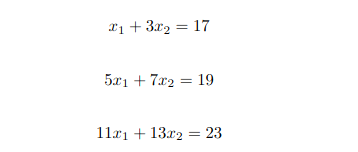

In [110]:
'''
Y = B + B1 x1 + B2 x2


  Y     X1    X2
  17    1     3
  19    5     7
  23    11    13

first , write data in matrix form

y = | 17 |
    | 19 |
    | 23 |

x = | 1  1  3 |
    | 1  5  7 |
    | 1  11 13|

we find the (3x3) x tranpose

x^T =   1   1   1
        1   5   11
        3   7   13

now, multiply the x tranpose with x

x^T * x  =  3    17    21
            17   147   179
            23   181   221

therefore, the equations is: Y = 3 + 17(x1) + 23(x2)
'''


'\nY = B + B1 x1 + B2 x2\n\n\n  Y     X1    X2\n  17    1     3\n  19    5     7\n  23    11    13\n\nfirst , write data in matrix form\n\ny = | 17 |\n    | 19 |\n    | 23 |\n\nx = | 1  1  3 |\n    | 1  5  7 |\n    | 1  11 13|\n\nwe find the (3x3) x tranpose\n\nx^T =   1   1   1\n        1   5   11\n        3   7   13\n\nnow, multiply the x tranpose with x\n\nx^T * x  =  3    17    21\n            17   147   179\n            23   181   221\n\ntherefore, the equations is: Y = 3 + 17(x1) + 23(x2)\n'

### (c) i. Write the closed form expression (using normal equations) to solve a Linear Regression problem.

In [111]:
# Y = 3 + 17(x1) + 23(x2)

###ii. Why do we prefer iterative methods like Gradient descent rather than using closed form solutions to solve a Linear Regression problem. 

In [112]:
"""
The main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases.

The formula which you wrote looks very simple, even computationally, because it only works for univariate case, i.e. when you have only one variable.
In the multivariate case, when you have many variables, the formulae is slightly more complicated on paper and requires much more calculations when you implement it in software:
β=(X′X)−1X′Y
Here, you need to calculate the matrix X′X then invert it (see note below). It's an expensive calculation. 
For your reference, the (design) matrix X has K+1 columns where K is the number of predictors and N rows of observations. In a machine learning algorithm you can end up with K>1000 and N>1,000,000.
The X′X matrix itself takes a little while to calculate, then you have to invert K×K matrix - this is expensive.

So, the gradient descent allows to save a lot of time on calculations. Moreover, the way it's done allows for a trivial parallelization, i.e. distributing the calculations across multiple processors or machines. The linear algebra solution can also be parallelized but it's more complicated and still expensive.

Additionally, there are versions of gradient descent when you keep only a piece of your data in memory, lowering the requirements for computer memory. 
Overall, for extra large problems it's more efficient than linear algebra solution.

This becomes even more important as the dimensionality increases, when you have thousands of variables like in machine learning.

"""

"\nThe main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases.\n\nThe formula which you wrote looks very simple, even computationally, because it only works for univariate case, i.e. when you have only one variable.\nIn the multivariate case, when you have many variables, the formulae is slightly more complicated on paper and requires much more calculations when you implement it in software:\nβ=(X′X)−1X′Y\nHere, you need to calculate the matrix X′X then invert it (see note below). It's an expensive calculation. \nFor your reference, the (design) matrix X has K+1 columns where K is the number of predictors and N rows of observations. In a machine learning algorithm you can end up with K>1000 and N>1,000,000.\nThe X′X matrix itself takes a little while to calculate, then you have to invert K×K matrix - this is expensive.\n\nSo, the gradient descent 

### (d) Coding Exercise: dataset : https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise
i. Visualize the data-set.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
dataset = pd.read_excel('airfoil_self_noise.xlsx',
 
                        header=None, 
                        names=['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 
                               'suction_side_displacement_thickness', 'scaled_sound_pressure_level'])
dataset.head()


,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [116]:
dataset.isna().sum()

frequency                              0
angle_of_attack                        0
chord_length                           0
free_stream_velocity                   0
suction_side_displacement_thickness    0
scaled_sound_pressure_level            0
dtype: int64

In [117]:
dataset.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

<Figure size 432x288 with 0 Axes>

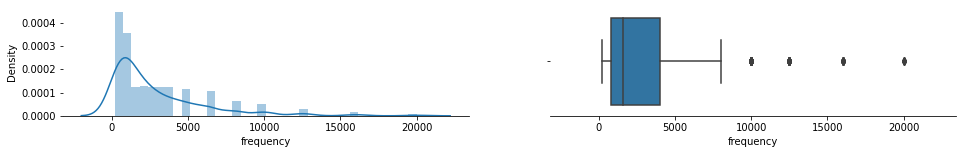

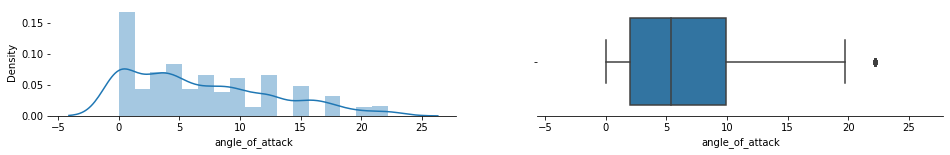

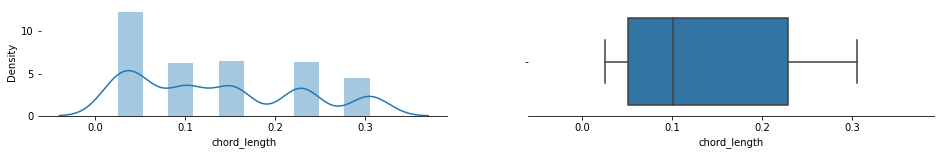

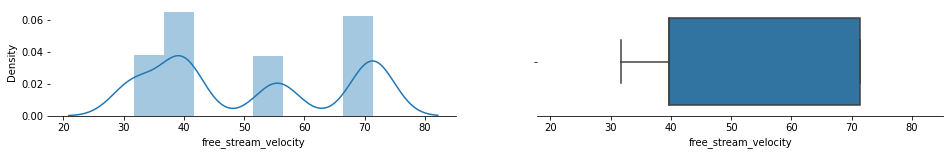

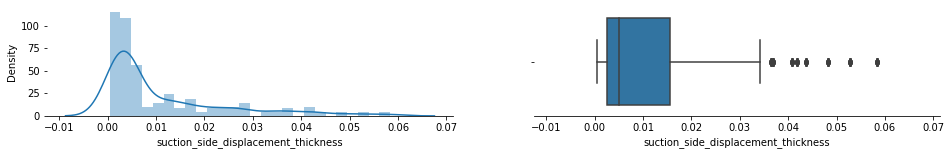

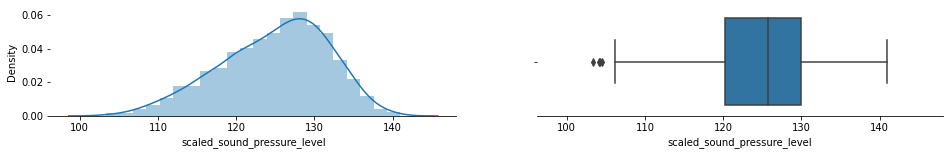

In [118]:
columns=dataset.columns.tolist()

plt.rcParams.update({'figure.max_open_warning': 0})
for i in range(dataset.shape[1]):
    plt.figure(i)
    
    f, axes = plt.subplots( 1, 2, figsize=(16, 2), sharex=True)
    sns.despine(left=True)

    sns.distplot(dataset[columns[i]], ax=axes[0])
    sns.boxplot(dataset[columns[i]], ax=axes[1])

plt.show()

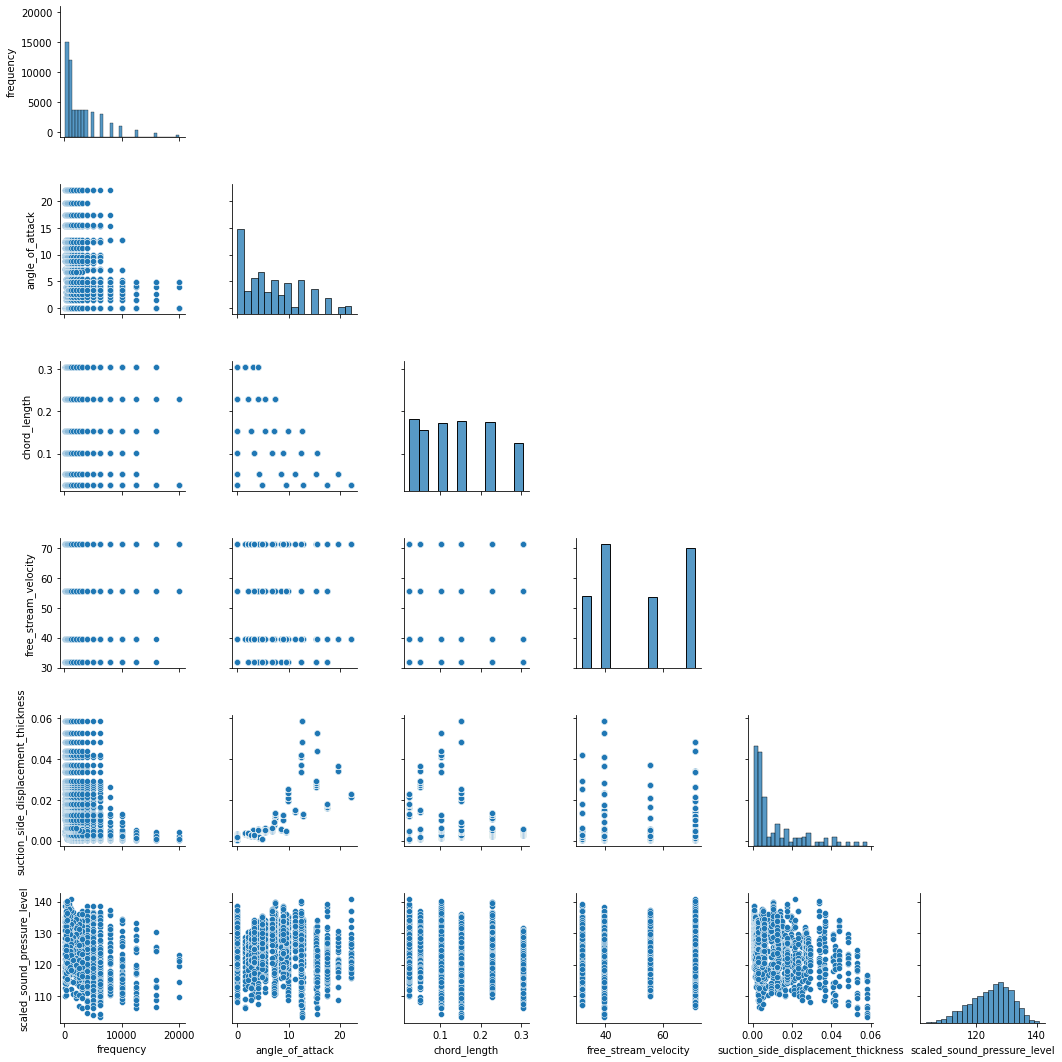

In [119]:
g = sns.pairplot(dataset)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

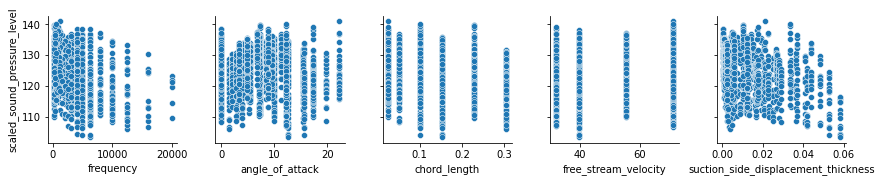

In [120]:
sns.pairplot(dataset, y_vars=dataset.columns[-1], x_vars=dataset.columns[:-1])

###  • After the necessary data preparation, make a linear regression model to predict the target variable.

In [121]:
dataset = pd.read_excel('airfoil_self_noise.xlsx')

X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [122]:
print(X)

[[1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.60000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 ...
 [4.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [5.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [6.30000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]]


In [123]:
print(y)

[125.201 125.951 127.591 ... 106.604 106.224 104.204]


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [125]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train,y_train)

LinearRegression()

In [126]:
y_predict_lr = regressor_lr.predict(x_test)

In [127]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,y_predict_lr)
print(r2_lr)

0.48657611175423365


In [128]:
from sklearn.model_selection import cross_val_score
accuracy_lr = cross_val_score(regressor_lr, x_train, y_train, cv=10)
print ('Accuracy: {:.2f}%'.format(accuracy_lr.mean()*100))
print ('Standard Deviation: {:.2f}%'.format(accuracy_lr.std()*100))

Accuracy: 50.67%
Standard Deviation: 8.18%


### • Briefly explain the following losses : RMSE, MSE, MAE. 

In [129]:
"""
RMSE :Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
      Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.
      In other words, it tells you how concentrated the data is around the line of best fit. 
      Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.


  The formula is:
rmse = (( sumation (x - x^)^2 )/N)^(1/2)
Where:

  i	= 	variable i
  N	= 	number of non-missing data points
  x	= 	actual observations time series
  x^	= 	estimated time series
"""

'\nRMSE :Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). \n      Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.\n      In other words, it tells you how concentrated the data is around the line of best fit. \n      Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.\n\n\n  The formula is:\nrmse = (( sumation (x - x^)^2 )/N)^(1/2)\nWhere:\n\n  i\t= \tvariable i\n  N\t= \tnumber of non-missing data points\n  x\t= \tactual observations time series\n  x^\t= \testimated time series\n'

In [130]:
"""
MSE : The mean squared error (MSE) tells you how close a regression line is to a set of points. 
      It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. 
      The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.
      It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.


MSE formula = (1/n) * Σ(actual – forecast)^2
Where:

    n = number of items,
    Σ = summation notation,
    Actual = original or observed y-value,
    Forecast = y-value from regression.
"""

'\nMSE : The mean squared error (MSE) tells you how close a regression line is to a set of points. \n      It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. \n      The squaring is necessary to remove any negative signs. It also gives more weight to larger differences.\n      It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.\n\n\nMSE formula = (1/n) * Σ(actual – forecast)^2\nWhere:\n\n    n = number of items,\n    Σ = summation notation,\n    Actual = original or observed y-value,\n    Forecast = y-value from regression.\n'

In [131]:
"""
MAE : In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. 
      Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, 
      and one technique of measurement versus an alternative technique of measurement. 
      MAE is calculated as the sum of absolute errors divided by the sample size

      Mean absolute error (MAE) is a loss function used for regression. Use MAE when you are doing regression and don't want outliers to play a big role. 
      The loss is the mean over the absolute differences between true and predicted values, deviations in either direction from the true value are treated the same way.

MAE = (sumation( |y - y^| ))/N

y^ is predicted value
"""

"\nMAE : In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. \n      Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, \n      and one technique of measurement versus an alternative technique of measurement. \n      MAE is calculated as the sum of absolute errors divided by the sample size\n\n      Mean absolute error (MAE) is a loss function used for regression. Use MAE when you are doing regression and don't want outliers to play a big role. \n      The loss is the mean over the absolute differences between true and predicted values, deviations in either direction from the true value are treated the same way.\n\nMAE = (sumation( |y - y^| ))/N\n\ny^ is predicted value\n"

### • Write a function from scratch to find any one of these loss functions. 

In [132]:
#for MAE i.e Mean Absolute Error
sum = 0 
for i in range(len(y_test)):
  sum = sum + abs(y_test[i] - y_predict_lr[i] )

MAE = sum / (len(y_test))

print(f'loss function using MAE is {MAE}')

loss function using MAE is 3.694200979840519


### • Also check the value of this loss using sklearn library. 

In [133]:
from sklearn.metrics import mean_absolute_error
loss = mean_absolute_error(y_test , y_predict_lr)
loss

3.69420097984052


  • Report the accuracy and R2 score of your model for both training and test data.

In [134]:
from sklearn.model_selection import cross_val_score
accuracy_lr = cross_val_score(regressor_lr, x_train, y_train)
accuracy_lr

array([0.51540753, 0.43431423, 0.55205885, 0.50168052, 0.57454551])

In [135]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test,y_predict_lr)
print(r2_lr)

0.48657611175423365


### 3. Classification/ Logistic Regression (40 points)
(a) Coding Exercise: https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset

i. Visualize the data set. (5 points)

ii. Impute the missing values. ( 3 points)

iii. Check correlation among the predictor variables and point out the redundant predictor variables if any. (5 points)

iv. Handle categorical variables using one-hot encoding or dummy encoding. (2 points)

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### i. Visualize the data set. (5 points)

In [137]:
data = pd.read_csv('mushroom_data.csv')
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [138]:
data.shape

(61069, 21)

In [139]:
data.isnull()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,True,False,False
61065,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,True,False,False
61066,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,True,False,False
61067,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,True,False,False


In [140]:
data.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

### iv. Handle categorical variables using one-hot encoding or dummy encoding. (2 points)

In [141]:
mappings=list()
encoder=LabelEncoder()
for column in range(len(data.columns)):
    data[data.columns[column]]=encoder.fit_transform( data[data.columns[column]])
    mappings_dict={index:label for index,label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [142]:
mappings

[{0: 'e', 1: 'p'},
 {0: 0.38,
  1: 0.44,
  2: 0.47,
  3: 0.48,
  4: 0.49,
  5: 0.5,
  6: 0.51,
  7: 0.52,
  8: 0.53,
  9: 0.54,
  10: 0.55,
  11: 0.56,
  12: 0.57,
  13: 0.58,
  14: 0.59,
  15: 0.6,
  16: 0.61,
  17: 0.62,
  18: 0.63,
  19: 0.64,
  20: 0.65,
  21: 0.66,
  22: 0.67,
  23: 0.68,
  24: 0.69,
  25: 0.7,
  26: 0.71,
  27: 0.72,
  28: 0.73,
  29: 0.74,
  30: 0.75,
  31: 0.76,
  32: 0.77,
  33: 0.78,
  34: 0.79,
  35: 0.8,
  36: 0.81,
  37: 0.82,
  38: 0.83,
  39: 0.84,
  40: 0.85,
  41: 0.86,
  42: 0.87,
  43: 0.88,
  44: 0.89,
  45: 0.9,
  46: 0.91,
  47: 0.92,
  48: 0.93,
  49: 0.94,
  50: 0.95,
  51: 0.96,
  52: 0.97,
  53: 0.98,
  54: 0.99,
  55: 1.0,
  56: 1.01,
  57: 1.02,
  58: 1.03,
  59: 1.04,
  60: 1.05,
  61: 1.06,
  62: 1.07,
  63: 1.08,
  64: 1.09,
  65: 1.1,
  66: 1.11,
  67: 1.12,
  68: 1.13,
  69: 1.14,
  70: 1.15,
  71: 1.16,
  72: 1.17,
  73: 1.18,
  74: 1.19,
  75: 1.2,
  76: 1.21,
  77: 1.22,
  78: 1.23,
  79: 1.24,
  80: 1.25,
  81: 1.26,
  82: 1.27,
  8

In [143]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,1481,6,2,6,0,2,3,10,1577,...,4,7,11,0,4,1,2,7,0,3
1,1,1614,6,2,6,0,2,3,10,1681,...,4,7,11,0,4,1,2,7,0,2
2,1,1362,6,2,6,0,2,3,10,1662,...,4,7,11,0,4,1,2,7,0,3
3,1,1372,2,3,1,0,2,3,10,1463,...,4,7,11,0,4,1,5,7,0,3
4,1,1419,6,3,6,0,2,3,10,1537,...,4,7,11,0,4,1,5,7,0,3


In [144]:
y=data['class']
x=data.drop('class',axis=1)

In [145]:
y

0        1
1        1
2        1
3        1
4        1
        ..
61064    1
61065    1
61066    1
61067    1
61068    1
Name: class, Length: 61069, dtype: int64

In [146]:
x

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1481,6,2,6,0,2,3,10,1577,1656,4,7,11,0,4,1,2,7,0,3
1,1614,6,2,6,0,2,3,10,1681,1766,4,7,11,0,4,1,2,7,0,2
2,1362,6,2,6,0,2,3,10,1662,1721,4,7,11,0,4,1,2,7,0,3
3,1372,2,3,1,0,2,3,10,1463,1545,4,7,11,0,4,1,5,7,0,3
4,1419,6,3,6,0,2,3,10,1537,1667,4,7,11,0,4,1,5,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,73,5,7,11,0,3,2,2,283,569,5,8,12,1,6,0,1,7,0,0
61065,82,2,7,11,0,3,2,2,208,490,5,8,12,1,6,0,1,7,0,0
61066,82,5,7,11,0,3,2,2,276,584,5,8,12,1,6,0,1,7,0,2
61067,79,2,7,11,0,3,2,2,246,491,5,8,12,1,6,0,1,7,0,2


### ii. Impute the missing values. ( 3 points)

In [147]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [148]:
x

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,2.036990,0.915714,-1.287113,-0.045582,-0.458029,-0.479250,1.113142,0.835268,3.217202,0.578939,-0.432597,0.151892,0.798799,-4.268749,-2.011264,1.738751,0.136786,0.308365,-0.492721,1.768817
1,2.348960,0.915714,-1.287113,-0.045582,-0.458029,-0.479250,1.113142,0.835268,3.542198,0.702065,-0.432597,0.151892,0.798799,-4.268749,-2.011264,1.738751,0.136786,0.308365,-0.492721,0.860194
2,1.757858,0.915714,-1.287113,-0.045582,-0.458029,-0.479250,1.113142,0.835268,3.482824,0.651695,-0.432597,0.151892,0.798799,-4.268749,-2.011264,1.738751,0.136786,0.308365,-0.492721,1.768817
3,1.781315,-0.954657,-1.016635,-1.622346,-0.458029,-0.479250,1.113142,0.835268,2.860957,0.454694,-0.432597,0.151892,0.798799,-4.268749,-2.011264,1.738751,1.675068,0.308365,-0.492721,1.768817
4,1.891560,0.915714,-1.016635,-0.045582,-0.458029,-0.479250,1.113142,0.835268,3.092204,0.591251,-0.432597,0.151892,0.798799,-4.268749,-2.011264,1.738751,1.675068,0.308365,-0.492721,1.768817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,-1.265671,0.448122,0.065275,1.531183,-0.458029,-0.093672,0.383697,-1.675402,-0.826496,-0.637767,0.363565,0.625757,1.109504,0.234261,0.336034,-0.575125,-0.375975,0.308365,-0.492721,-0.957054
61065,-1.244560,-0.954657,0.065275,1.531183,-0.458029,-0.093672,0.383697,-1.675402,-1.060868,-0.726194,0.363565,0.625757,1.109504,0.234261,0.336034,-0.575125,-0.375975,0.308365,-0.492721,-0.957054
61066,-1.244560,0.448122,0.065275,1.531183,-0.458029,-0.093672,0.383697,-1.675402,-0.848371,-0.620977,0.363565,0.625757,1.109504,0.234261,0.336034,-0.575125,-0.375975,0.308365,-0.492721,0.860194
61067,-1.251597,-0.954657,0.065275,1.531183,-0.458029,-0.093672,0.383697,-1.675402,-0.942120,-0.725074,0.363565,0.625757,1.109504,0.234261,0.336034,-0.575125,-0.375975,0.308365,-0.492721,0.860194


In [149]:
x_train,x_test,y_train,y_test=train_test_split( x , y , test_size=0.3)

In [150]:
model = LogisticRegression()

In [151]:
model.fit(x_train,y_train)

LogisticRegression()

In [152]:
print(f"Logistic Regression :{model.score(x_test,y_test)}")

Logistic Regression :0.6498553572403253


### iii. Check correlation among the predictor variables and point out the redundant predictor variables if any. (5 points)

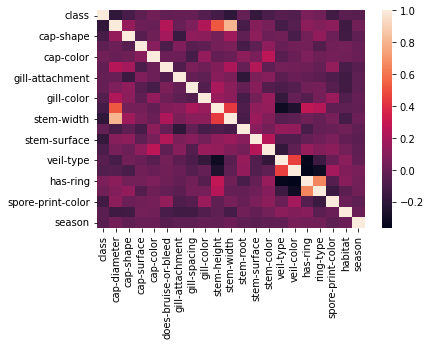

In [153]:
corr=data.corr()
sns.heatmap(corr)

# b) Coding Exercise: dataset: 
## https://archive.ics.uci.edu/ml/datasets/glass+identification

i. Visualize the data-set.



In [6]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('glass.data.csv')

In [9]:
data.shape

(213, 11)

In [10]:
data.head(5)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [11]:
data.columns = ['id','ri','na','mg','al','si','k','ca','ba','fe','class']

In [12]:
data

,id,ri,na,mg,al,si,k,ca,ba,fe,class
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


ii. • After the necessary data preparation, make a logistic regression model to predict the target
variable.

• Report the accuracy and other metrics of the model (like precision, recall, F1 score). 

• Which metric do you think is more relevant here? Explain.

In [18]:
x = data.iloc[:,1:-1].values
y = data['class']

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [20]:
x = scaler.transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [22]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [23]:
log.fit(x_train , y_train)

LogisticRegression()

In [25]:
y_pred = log.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,y_pred)

0.59375